In [19]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt



In [3]:
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
input_shape = (224, 224, 3)

In [5]:
batch_size = 32
epochs = 20

In [6]:
train_path = '/Users/nathan/Desktop/Code/Tomato-disease/training/PlantVillage'
val_path = '/Users/nathan/Desktop/Code/Tomato-disease/training/PlantVillage'

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [8]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 4500 images belonging to 3 classes.


In [10]:
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 4500 images belonging to 3 classes.


In [11]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

In [12]:
for layer in vgg16.layers:
    layer.trainable = False

In [13]:
x = Flatten()(vgg16.output)
x = Dense(256, activation='relu')(x)

x = Dense(train_generator.num_classes, activation='softmax')(x)

In [14]:
model = Model(inputs=vgg16.input, outputs=x)

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/20
141/141 [==============================] - 7535s 54s/step - loss: 0.5571 - accuracy: 0.8384 - val_loss: 0.1761 - val_accuracy: 0.9304
Epoch 2/20
141/141 [==============================] - 7645s 54s/step - loss: 0.1963 - accuracy: 0.9189 - val_loss: 0.1894 - val_accuracy: 0.9142
Epoch 3/20
141/141 [==============================] - 6438s 46s/step - loss: 0.1710 - accuracy: 0.9267 - val_loss: 0.0899 - val_accuracy: 0.9656
Epoch 4/20
141/141 [==============================] - 6012s 43s/step - loss: 0.1226 - accuracy: 0.9489 - val_loss: 0.0853 - val_accuracy: 0.9664
Epoch 5/20
141/141 [==============================] - 6121s 44s/step - loss: 0.1121 - accuracy: 0.9567 - val_loss: 0.0632 - val_accuracy: 0.9796
Epoch 6/20
141/141 [==============================] - 6140s 44s/step - loss: 0.1018 - accuracy: 0.9616 - val_loss: 0.0736 - val_accuracy: 0.9693
Epoch 7/20
141/141 [==============================] - 6001s 43s/step - loss: 0.0909 - accuracy: 0.9644 - val_loss: 0.0476 - val_ac

In [18]:
batch_images, batch_labels = next(train_generator)


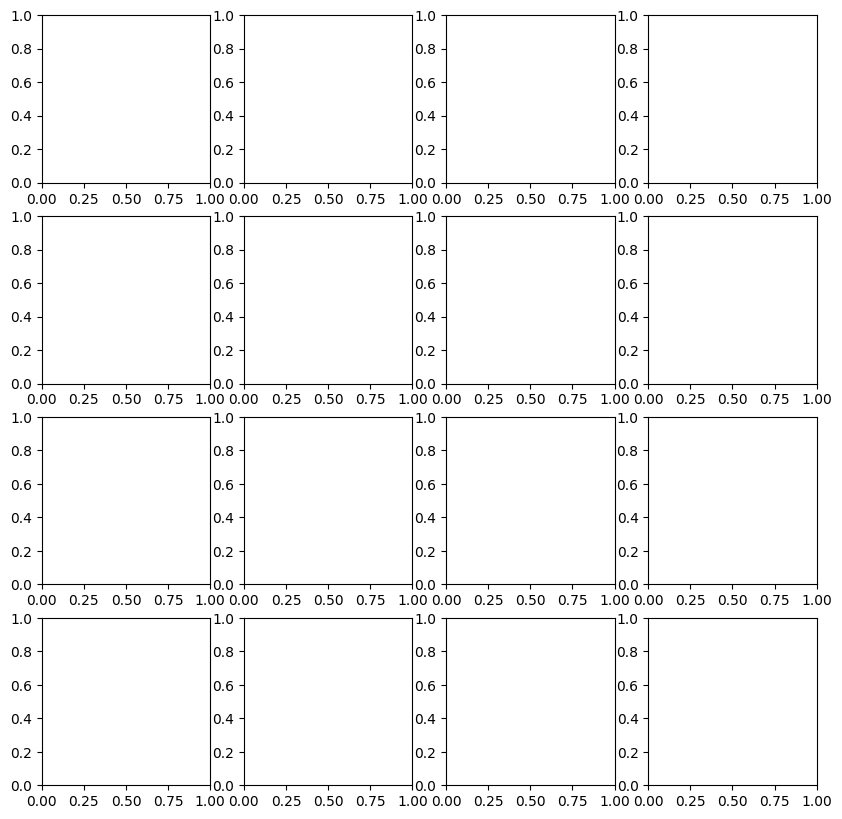

In [20]:
fig, axs = plt.subplots(4, 4, figsize=(10,10))

In [21]:
for i, ax in enumerate(axs.flat):
    ax.imshow(batch_images[i])
    ax.axis('off')
    ax.set_title(np.argmax(batch_labels[i]))

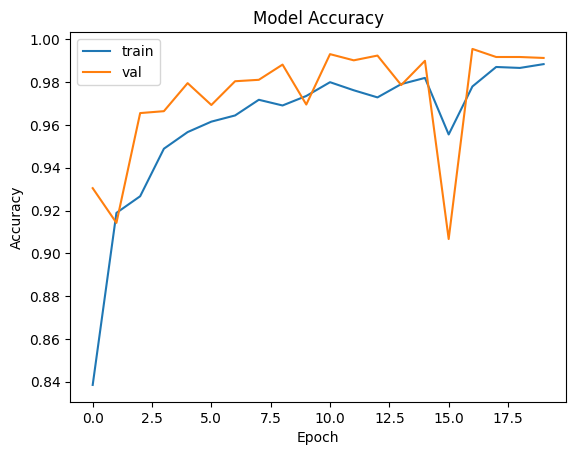

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
def show_images(images, labels, rows, cols):
    fig, axs = plt.subplots(rows, cols, figsize=(10,10))
    for i, ax in enumerate(axs.flat):
        ax.imshow(images[i])
        ax.axis('off')
        ax.set_title(np.argmax(labels[i]))

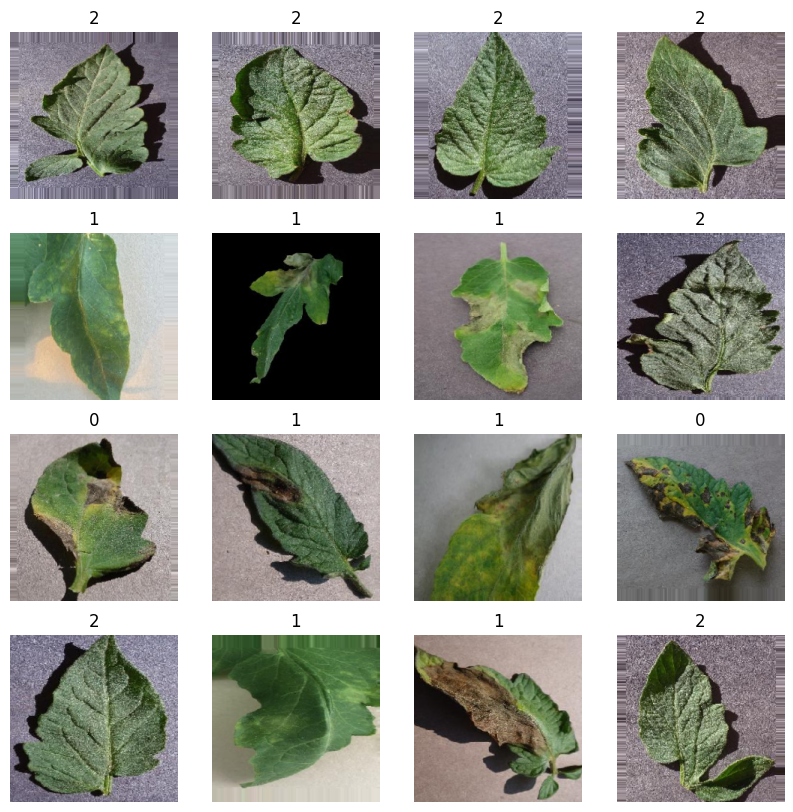

In [24]:
show_images(batch_images, batch_labels, 4, 4)

In [25]:
def show_images(images, labels, rows, cols, class_names):
    fig, axs = plt.subplots(rows, cols, figsize=(10,10))
    for i, ax in enumerate(axs.flat):
        ax.imshow(images[i])
        ax.axis('off')
        label_idx = np.argmax(labels[i])
        label_name = class_names[label_idx]
        ax.set_title(label_name)

In [26]:
class_names = list(train_generator.class_indices.keys())

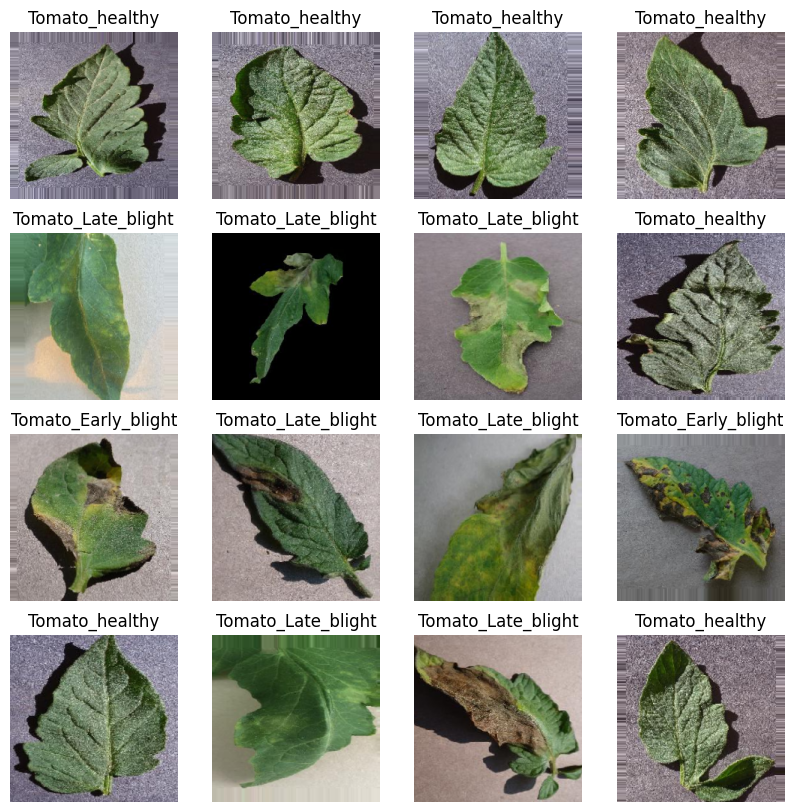

In [27]:
show_images(batch_images, batch_labels, 4, 4, class_names)

In [41]:
img_path = '/Users/nathan/Downloads/Tomato-late.png'
img = keras.preprocessing.image.load_img(img_path, target_size=input_shape[:2])
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

In [42]:
prediction = model.predict(img_array)[0]
class_idx = np.argmax(prediction)
confidence = prediction[class_idx]

1/1 [==============================] - 1s 854ms/step


In [43]:
class_names = list(train_generator.class_indices.keys())
class_name = class_names[class_idx]

In [44]:
print(f'Class index: {class_idx}')
print(f'Confidence: {confidence}')

Class index: 0
Confidence: 0.9183229207992554


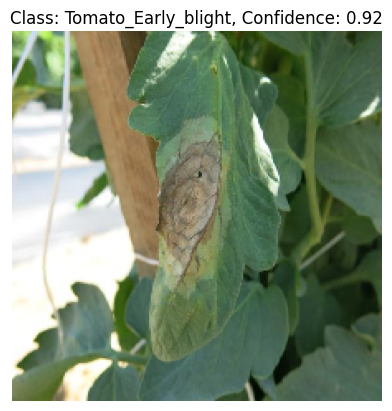

In [45]:
fig, ax = plt.subplots()
ax.imshow(img_array[0])
ax.set_title(f'Class: {class_name}, Confidence: {confidence:.2f}')
ax.axis('off')
plt.show()

In [46]:
import os
save_dir = '/Users/nathan/Desktop/Code/VGG16'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [47]:
model.save(os.path.join(save_dir, 'my_VGG16_model.h5'))